In [2]:
conda install geopandas

Solving environment: done

## Package Plan ##

  environment location: /Users/chen/opt/anaconda3

  added / updated specs:
    - geopandas


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.11.27 |                0         131 KB
    cairo-1.14.12              |       hc4e6be7_4         860 KB
    certifi-2019.11.28         |           py37_0         156 KB
    cfitsio-3.470              |       hb33e7b4_2         823 KB
    click-plugins-1.1.1        |             py_0          11 KB
    cligj-0.5.0                |           py37_0          12 KB
    conda-4.8.1                |           py37_0         2.8 MB
    fiona-1.8.11               |   py37heeaa653_0         627 KB
    fontconfig-2.13.0          |       h5d5b041_1         202 KB
    freexl-1.0.5               |       h1de35cc_0          39 KB
    gdal-3.0.2                 |   py37hbe65578_0         1.6 MB


In [11]:
conda install descartes

Solving environment: done

## Package Plan ##

  environment location: /Users/chen/opt/anaconda3

  added / updated specs:
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    descartes-1.1.0            |             py_3           9 KB
    ------------------------------------------------------------
                                           Total:           9 KB

The following NEW packages will be INSTALLED:

  descartes          pkgs/main/noarch::descartes-1.1.0-py_3



descartes-1.1.0      | 9 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [1]:
import geopandas as gp
import fiona
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, LineString

In [2]:
NY_GEO = gp.read_file("nyc/geo_export_ed1b9dba-ece4-470b-8a1e-2954c9ff29fe.shp", driver='shapefile')
CITI = pd.read_csv('201911-citibike-tripdata.csv', nrows=5000)
NY_STATION = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
#station = pd.read_csv("http://web.mta.info/developers/data/nyct/subway/Stations.csv")

In [3]:
def line_up(row):
    return LineString([[row['start station longitude'], row['start station latitude']], [row['end station longitude'], row['end station latitude']]])

In [4]:
BLYN = NY_GEO[(NY_GEO.boro_name == 'Brooklyn')]

In [5]:
CITI_DF_END = gp.GeoDataFrame(
    CITI, 
    crs = {'init': 'epsg:4326'},
    geometry = gp.points_from_xy(CITI['end station longitude'], CITI['end station latitude']),
    )

In [6]:
STATION_DF = gp.GeoDataFrame(
    NY_STATION, 
    crs = {'init': 'epsg:4326'},
    geometry = gp.points_from_xy(NY_STATION['GTFS Longitude'], NY_STATION['GTFS Latitude']))

In [7]:
# "clip" a points layer to the boundary of a polygon
#BLYN_CITI = CITI_DF[CITI_DF.geometry.intersects(BLYN.geometry.unary_union)]
BLYN_CITI_END = CITI_DF_END[CITI_DF_END.geometry.intersects(BLYN.geometry.unary_union)]
# "clip" a points layer to the boundary of a polygon
BLYN_STATION = STATION_DF[STATION_DF.geometry.intersects(BLYN.geometry.unary_union)]

In [8]:
BLYN_CITI_START = gp.GeoDataFrame(
    BLYN_CITI_END.copy(),
    crs = {'init': 'epsg:4326'},
    geometry = gp.points_from_xy(BLYN_CITI_END['start station longitude'], BLYN_CITI_END['start station latitude']),
    )

In [11]:
BLYN_CITI_PATH = gp.GeoDataFrame(
    BLYN_CITI_END.copy(),
    crs = {'init': 'epsg:4326'}    )

In [12]:
line_up = BLYN_CITI_PATH.apply(line_up, axis=1)
BLYN_CITI_PATH['geometry'] = line_up
BLYN_CITI_PATH.set_geometry('geometry')
BLYN_CITI_PATH;

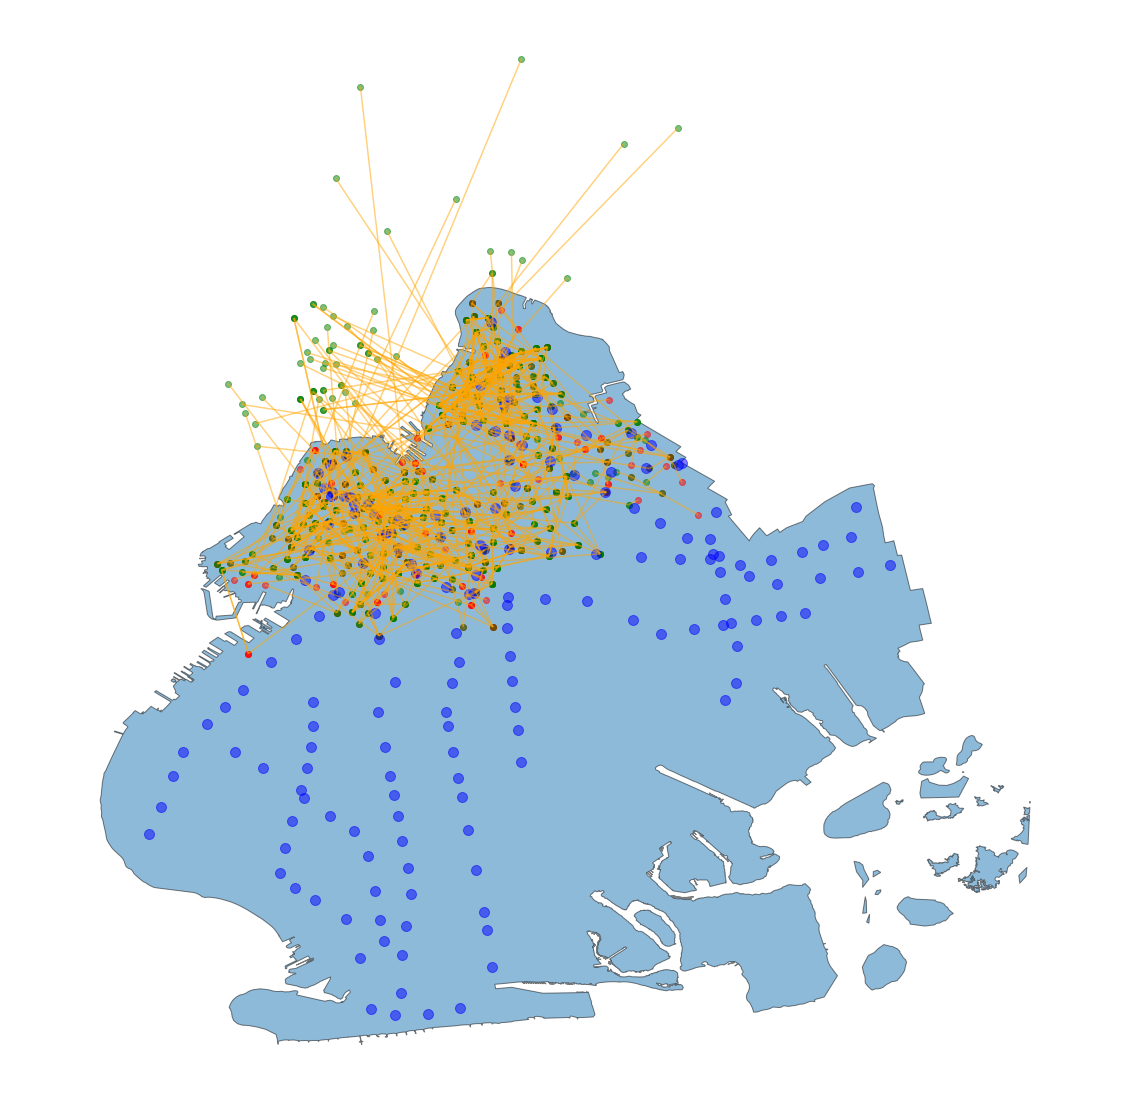

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
BLYN.plot(alpha=.5,edgecolor='black', ax=ax)
BLYN_CITI_PATH.plot(alpha=.5,color='orange', ax=ax)
BLYN_CITI_END.plot(alpha=.5, marker='o', color='red', ax=ax)
BLYN_CITI_START.plot(alpha=.5, marker='o', color='green', ax=ax)
BLYN_STATION.plot(alpha=.5, marker='o', color='blue', markersize=100, ax=ax)
plt.axis('equal')
ax.set_axis_off()

,A,C
0,7,7
1,7,8
2,7,9


In [17]:
df['A']=[7,7,7]